# Close system Control Pulse optimiser

In [343]:
####Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import krotov
from IPython.display import Image
from numpy.fft import rfftn
from qutip import (Qobj, about, basis, coherent, coherent_dm, create, destroy,
                   expect, fock, fock_dm, mesolve, qeye, sigmax, sigmay,
                   sigmaz, tensor, thermal_dm, sesolve,  ket2dm, Options, fidelity, Bloch)

%matplotlib inline






In [891]:
##Define System Hamiltonian
def hamiltonian(h,w):
    H_0 = -1*0.5*h*w*sigmaz()
    return H_0

hamiltonian(1,1-0.001)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-0.4995  0.    ]
 [ 0.      0.4995]]

In [892]:
##Define initial state

def initialstate (phi_0, theta_0):
        rho_0 = ket2dm(Qobj(np.array([[np.cos(theta_0/2)],[np.exp(1j*phi_0)*np.sin(theta_0/2)]])))
        return rho_0

initialstate = initialstate(0,0)

In [893]:
##Define target state
def targetstate (phi_1, theta_1):
        rho_1 = ket2dm(Qobj(np.array([[np.cos(theta_1/2)],[np.exp(1j*phi_1)*np.sin(theta_1/2)]])))
        return rho_1

targetstate = targetstate(np.pi,np.pi/2)

In [929]:
##Time step
step = 200
totalsteps = 20
t=np.linspace(0,totalsteps,step)


##Define Control Drives

###Important! parameters to change

def controldrive (Amx,wx,Amy,wy,g):
    Omegax = -Amx*g*np.cos(wx*t)
    Omegay = -Amy*g*np.sin(wy*t)
    return Omegax, Omegay

Controldrivefunction = controldrive(0.2, np.pi/2, 0.2,np.pi/2 , 2)

##Define Total hamiltonian
def totalhamiltonian (H_Cx, H_Cy):
    H = [hamiltonian(1,1-100), [H_Cx, Controldrivefunction[0]], [H_Cy, Controldrivefunction[1]]]
    return H

In [930]:
##collapse operator
def col(gamma, gamma1, gamma2):
    collapse = [np.sqrt(gamma)*sigmax(), np.sqrt(gamma1)*sigmay(), np.sqrt(gamma2)*sigmaz()]
    return collapse
collapse = col(1/24, 1/24, 1/24)



##Dynamic Solver for coordinates on bloch sphere
def dynamicsolver(step, H, rho_0):
    t=np.linspace(0,totalsteps,step)
    result=mesolve(H,rho_0,t,[collapse],[sigmax(), sigmay(), sigmaz()])
    return result

Finalresult = dynamicsolver(step,totalhamiltonian(sigmax(), sigmay()), initialstate)

##Dynamic Solver for states
def dynamicsolver1(step, H, rho_0):
    t=np.linspace(0,totalsteps,step)
    result=mesolve(H,rho_0,t,[collapse],[])
    return result

Finalresult1 = dynamicsolver1(step,totalhamiltonian(sigmax(), sigmay()), initialstate)

def dynamicsolver2(step, H, rho_0):
    t=np.linspace(0,totalsteps,step)
    result=mesolve(H,rho_0,t,[collapse],[initialstate,targetstate])
    return result

Finalresult2 = dynamicsolver2(step,totalhamiltonian(sigmax(), sigmay()), initialstate)


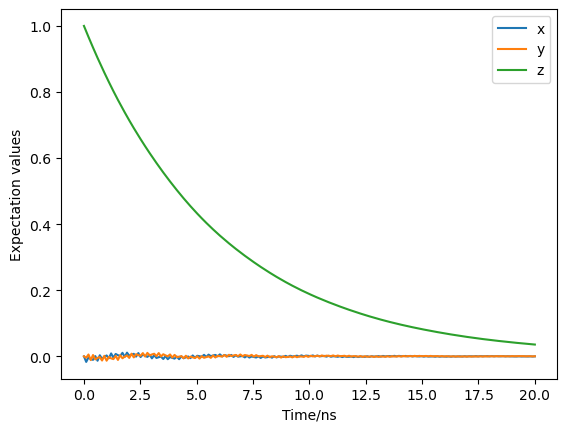

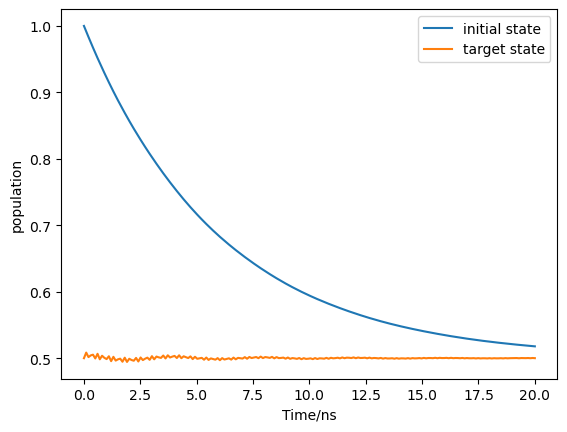

In [931]:
plt.figure() 
plt.xlabel('Time/ns')
plt.ylabel('Expectation values') 
plt.plot(t, Finalresult.expect[0]) 
plt.plot(t, Finalresult.expect[1]) 
plt.plot(t, Finalresult.expect[2]) 
plt.legend(("x","y","z")) 
plt.show() 

plt.figure() 
plt.xlabel('Time/ns')
plt.ylabel('population') 
plt.plot(t, Finalresult2.expect[0]) 
plt.plot(t, Finalresult2.expect[1]) 
plt.legend(("initial state","target state")) 
plt.show() 

In [932]:
##bloch sphere animation

#b = Bloch()
#pnt = [Finalresult.expect[0][0],Finalresult.expect[1][0],Finalresult.expect[2][0]]
#b.add_vectors(pnt)
##b.show()
#for i in range(300):
    #b.clear()
    #b.add_vectors([Finalresult.expect[0][i],Finalresult.expect[1][i],Finalresult.expect[2][i]])
    #b.save(dirc='temp') #saving images to temp directory in current working directory

200


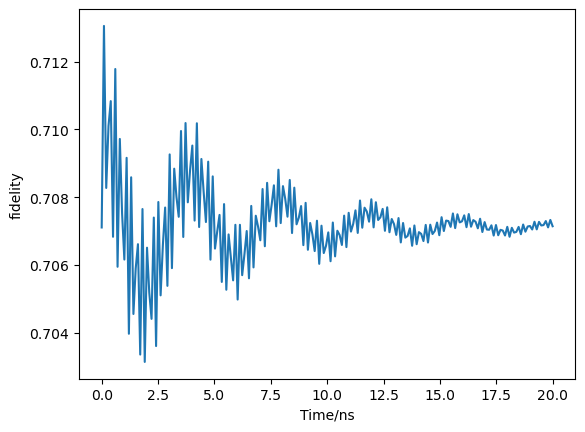

Average of the list = 0.70785
0.00101


In [933]:
## fiedility measure
##why is fiedility always 0.5
print(step) 

fidel = []
for i in range(step):
    fidel.append(fidelity(Finalresult1.states[i],targetstate))
fidel  
plt.figure() 
plt.xlabel('Time/ns') 
plt.ylabel('fidelity') 
plt.plot(t, fidel) 
plt.show() 

mean = []
for i in range(step):
    if fidel[i]>0.70711:
        mean.append(fidel[i])
    else:
        continue

def Average(mean): 
    return sum(mean) / len(mean) 
 
average = Average(mean) 
 
# Printing average of the list 
print("Average of the list =", round(average, 5)) 


print(round(np.std(mean), 5))

In [850]:
##parameters

objectives = [
    krotov.Objective(initial_state = initialstate, target = targetstate, H = totalhamiltonian)
]
objectives



ValueError: Invalid H, must be a Qobj, or a nested list, not function

In [16]:
fidelity(Finalresult1.states[6],targetstate)

0.7071067811865476